In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
image_size = [224,224]
train_path = 'Datasets_car/train'
test_path =  'Datasets_car/test'

In [6]:
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 21s 0us/step


In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
for layer in resnet.layers:
    layer.trainable = False

In [14]:
folders = glob('Datasets_car/train/*')

In [15]:
folders

['Datasets_car/train/lamborghini',
 'Datasets_car/train/mercedes',
 'Datasets_car/train/audi']

In [17]:
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders) , activation='softmax')(x)

In [26]:
model = Model(inputs = resnet.input , outputs = prediction)

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
train_datagen = ImageDataGenerator(
        rescale=1./255,         #apply feature scaling to all 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [31]:
training_set = train_datagen.flow_from_directory('Datasets_car/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [32]:
test_set = test_datagen.flow_from_directory('Datasets_car/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [33]:
training_set[0]

(array([[[[0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          ...,
          [0.6117647 , 0.6156863 , 0.63529414],
          [0.6117647 , 0.6156863 , 0.63529414],
          [0.6117647 , 0.6156863 , 0.63529414]],
 
         [[0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          ...,
          [0.61119616, 0.6151177 , 0.6347256 ],
          [0.61119616, 0.6151177 , 0.6347256 ],
          [0.61119616, 0.6151177 , 0.6347256 ]],
 
         [[0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          [0.43921572, 0.43921572, 0.47058827],
          ...,
          [0.60784763, 0.6117692 , 0.63137704],
          [0.60784763, 0.6117692 , 0.63137704],
          [0.60784763, 0.6117692 , 0.63137704]],
 
         ...,
 
         [[0.9019432 , 0.9019432 , 0.9019432 ],
          [0.90194

In [34]:
test_set[0]

(array([[[[0.02352941, 0.03137255, 0.08235294],
          [0.02745098, 0.03529412, 0.08627451],
          [0.03921569, 0.04705883, 0.09803922],
          ...,
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922]],
 
         [[0.02352941, 0.03137255, 0.08235294],
          [0.02745098, 0.03529412, 0.08627451],
          [0.03921569, 0.04705883, 0.09803922],
          ...,
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922]],
 
         [[0.02352941, 0.03137255, 0.08235294],
          [0.02745098, 0.03529412, 0.08627451],
          [0.03921569, 0.04705883, 0.09803922],
          ...,
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922],
          [0.03137255, 0.03921569, 0.09803922]],
 
         ...,
 
         [[0.02745098, 0.03529412, 0.09411766],
          [0.02745

In [35]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_97251/1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 10s 6s/step - loss: 4.0658 - accuracy: 0.4531 - val_loss: 5.1715 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 8s 5s/step - loss: 6.0170 - accuracy: 0.3906 - val_loss: 2.2800 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 4.1429 - accuracy: 0.3906 - val_loss: 9.3095 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 10s 8s/step - loss: 5.5781 - accuracy: 0.3281 - val_loss: 0.9379 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 8s 5s/step - loss: 1.9529 - accuracy: 0.5156 - val_loss: 2.6508 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 4.3346 - accuracy: 0.5156 - val_loss: 2.5384 - val_accuracy: 0.6207
Epoch 7/50
2/2 [==============================] - 7s 5s/step - loss: 3.3849 - accuracy: 0.5156 - val_loss: 1.3283 - val_accuracy: 0.6034
Epoch 8/50
2/2 [=======================

In [36]:
r.history

{'loss': [4.065774917602539,
  6.016952991485596,
  4.142867088317871,
  5.578097820281982,
  1.9529001712799072,
  4.334556579589844,
  3.3849432468414307,
  1.3263100385665894,
  2.7600619792938232,
  0.8160114288330078,
  1.6873751878738403,
  1.265993356704712,
  0.6434745788574219,
  1.2439180612564087,
  0.6335228681564331,
  1.0569491386413574,
  0.5449471473693848,
  0.6634851098060608,
  0.3854754567146301,
  0.560136079788208,
  0.4782367944717407,
  0.5875864028930664,
  0.4475783407688141,
  0.5292072296142578,
  0.41637080907821655,
  0.42218685150146484,
  0.3170255720615387,
  0.3612669110298157,
  0.3071143925189972,
  0.3103800415992737,
  0.2946331799030304,
  0.3725917935371399,
  0.2896156907081604,
  0.3618524670600891,
  0.27799341082572937,
  0.33203285932540894,
  0.20942413806915283,
  0.2718646824359894,
  0.24429479241371155,
  0.2873392105102539,
  0.24845969676971436,
  0.30853748321533203,
  0.2622627913951874,
  0.21887803077697754,
  0.21453648805618286,

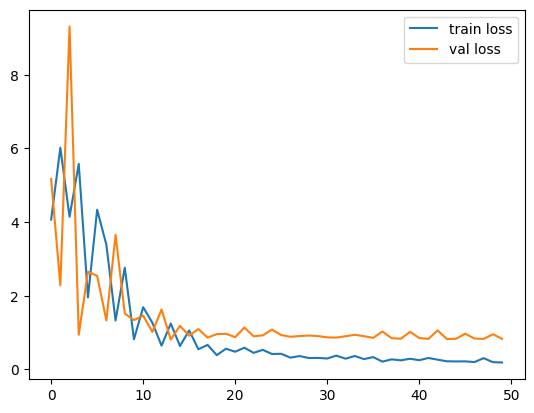

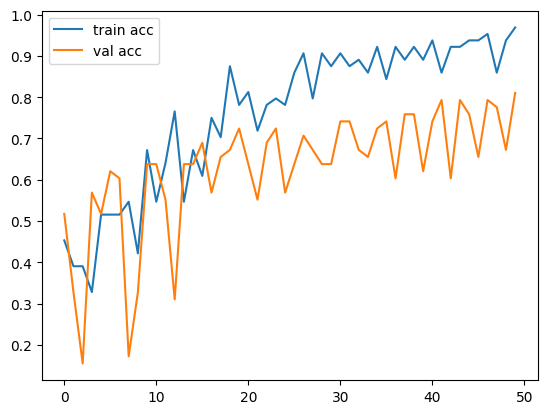

<Figure size 640x480 with 0 Axes>

In [37]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
y_pred = model.predict(test_set)


2/2 [==============================] - 5s 2s/step


In [39]:
y_pred

array([[5.54539859e-01, 2.52100289e-01, 1.93359852e-01],
       [4.87615354e-03, 9.82823372e-01, 1.23004038e-02],
       [2.76520222e-01, 1.34100229e-01, 5.89379489e-01],
       [4.18520980e-02, 5.75957954e-01, 3.82189840e-01],
       [3.42523854e-05, 9.98044133e-01, 1.92154513e-03],
       [3.37298177e-02, 8.94513130e-01, 7.17570409e-02],
       [5.52103762e-03, 9.53689635e-01, 4.07892838e-02],
       [2.25227103e-02, 1.24565829e-02, 9.65020657e-01],
       [1.30585581e-01, 6.70324206e-01, 1.99090242e-01],
       [1.37325436e-01, 3.34049255e-01, 5.28625250e-01],
       [2.98221149e-02, 7.25223243e-01, 2.44954690e-01],
       [4.53878380e-03, 5.30280843e-02, 9.42433178e-01],
       [2.49402542e-02, 8.68621707e-01, 1.06438085e-01],
       [5.17174378e-02, 9.35302556e-01, 1.29799908e-02],
       [8.81699566e-03, 9.53821599e-01, 3.73614468e-02],
       [2.72562876e-02, 4.84236807e-01, 4.88506883e-01],
       [2.77131982e-02, 6.60284329e-03, 9.65683997e-01],
       [3.29740718e-03, 9.66248

In [40]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/Users/dhirajmarathe/miniconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2])

In [3]:
from tensorflow.keras.models import load_model

In [45]:
from tensorflow.keras.preprocessing import image

In [4]:
model = load_model('model_resnet50.h5')

In [5]:
model

In [48]:
img=image.load_img('Datasets_car/Test/lamborghini/11.jpg',target_size=(224,224))

In [49]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [51]:
x.shape

(224, 224, 3)

In [52]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [53]:
model.predict(img_data)


1/1 [==============================] - 1s 750ms/step


array([[1.4058547e-10, 3.2879855e-19, 1.0000000e+00]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 88ms/step


In [55]:
a==1

array([False])